# 0. 라이브러리

In [1]:
# 표준 라이브러리
import os

# 서드파티 라이브러리
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# TensorFlow 및 Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ConvNeXtTiny

# 1. 갑상선 암 데이터셋 다운로드

In [ ]:
import kagglehub

# Download latest version
# path = kagglehub.dataset_download("tingzen/thyroid-for-pretraining")

# print("Path to dataset files:", path)

## 데이터셋 확인

In [3]:
base_dir = '../data/augtrain'

In [5]:
C0_paths=[]
C1_paths=[]

for dirname, _, filenames in os.walk(base_dir): # 기본 디렉터리 아래의 모든 폴더와 파일을 재귀적으로 탐색
    print(f"클래스 {dirname}의 샘플 수는: {len(filenames)}")

    for filename in filenames:
        if dirname[-1]=="0":
            C0_paths.append(os.path.join(dirname, filename))
        else :
            C1_paths.append(os.path.join(dirname, filename))

클래스 ../data/augtrain의 샘플 수는: 0
클래스 ../data/augtrain\0의 샘플 수는: 3282
클래스 ../data/augtrain\1의 샘플 수는: 4006


In [6]:
print(f"클래스 0의 샘플 수는: {len(C0_paths)}") # 정상 조직
print(f"클래스 1의 샘플 수는: {len(C1_paths)}") # 갑성선 암 조직

클래스 0의 샘플 수는: 3282
클래스 1의 샘플 수는: 4006


# [테스트] 이미지 전처리 테스트

In [ ]:
def preprocess_image(image_path):
  # 1. 이미지 불러오기
  image = cv2.imread(image_path)

  # 2. 노이즈 제거
  blurred_image = cv2.GaussianBlur(image, (7, 7), 0)

  # 수평으로 이미지 나란히 표시
  plt.figure(figsize=(10, 5))

  # 원본
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')

  # 노이즈 제거
  plt.subplot(1, 2, 2)
  plt.imshow(blurred_image, cmap='gray')
  plt.title('Gaussian Blurred Image')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

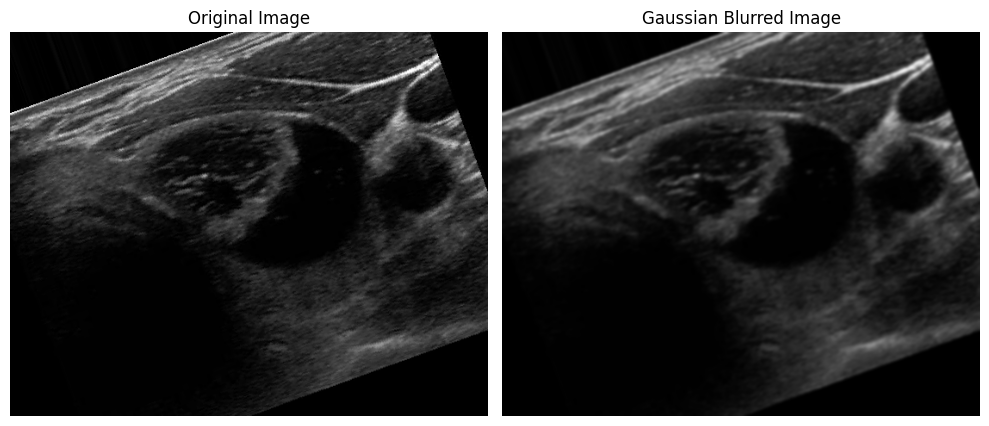

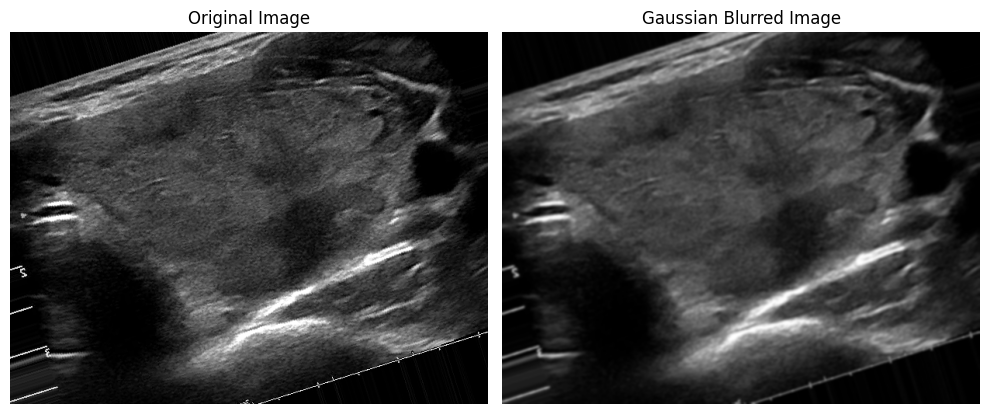

In [8]:
# 가우시안 블러 처리
image_path_0 = base_dir+"/0/0_1.bmp"
image_path_1 = base_dir+"/1/1001_1.bmp"

preprocess_image(image_path_0)
preprocess_image(image_path_1)

In [9]:
def preprocess_image(image_path):
  # 1. 이미지 불러오기
  image = cv2.imread(image_path)

  # 2. 그레이스케일로 변환
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # 3. CLAHE 대비 향상
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  enhanced_image = clahe.apply(gray_image)

  # 수평으로 이미지 나란히 표시
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(enhanced_image, cmap='gray')
  plt.title('CLAHE Enhanced Image')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

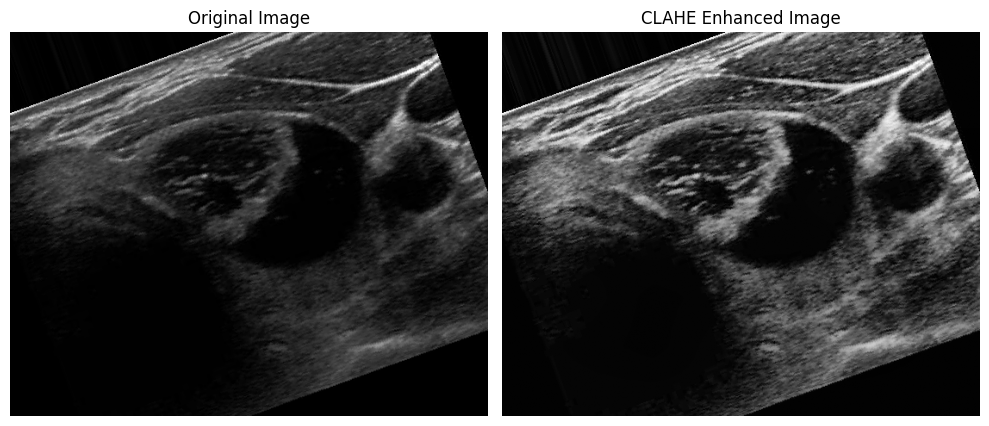

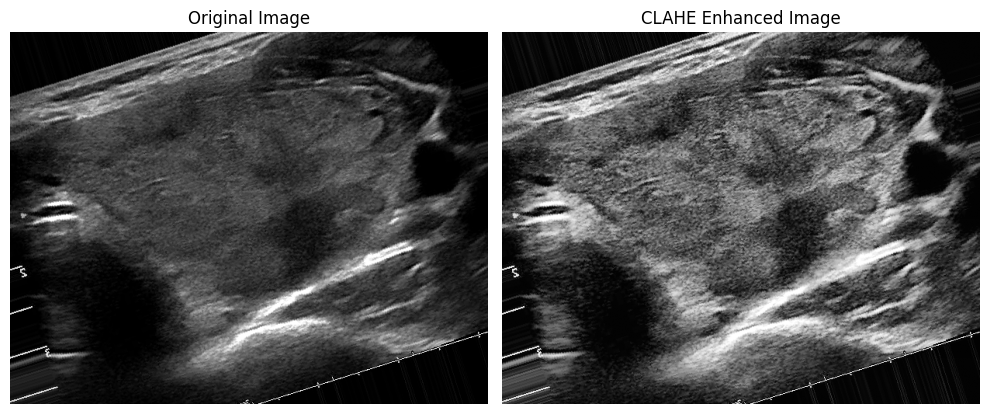

In [10]:
preprocess_image(image_path_0)
preprocess_image(image_path_1)

In [11]:
def preprocess_image(image_path):
  # 1. 이미지 불러오기
  image = cv2.imread(image_path)

  # 2. 노이즈 제거
  blurred_image = cv2.GaussianBlur(image, (5,5), 0)

  # 3. 그레이스케일로 변환
  gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

  # 4. CLAHE로 대비 향상
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  enhanced_image = clahe.apply(gray_image)

  # 5. 정규화 (0~1 범위로)
  # normalized = enhanced_image / 255.0

  # 6. 리사이징 (180x180로 조정)
  # resized_image = cv2.resize(normalized, (img_height, img_width))

  # 수평으로 이미지 나란히 표시
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 3, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(blurred_image, cmap='gray')
  plt.title('Gaussian Blurred Image')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(enhanced_image, cmap='gray')
  plt.title('Gaussian Blurred and CLAHE Enhanced Image')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

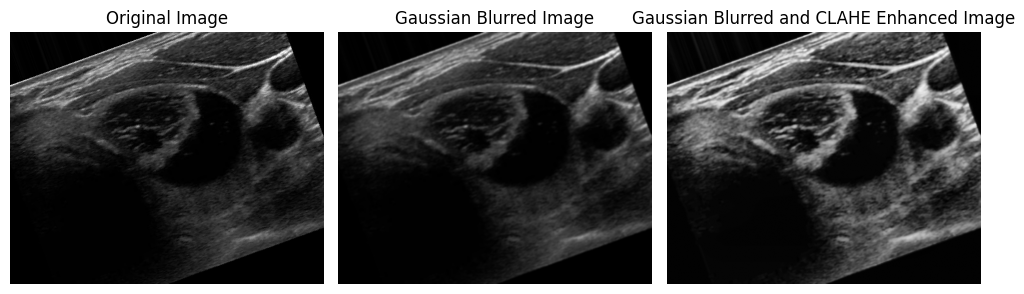

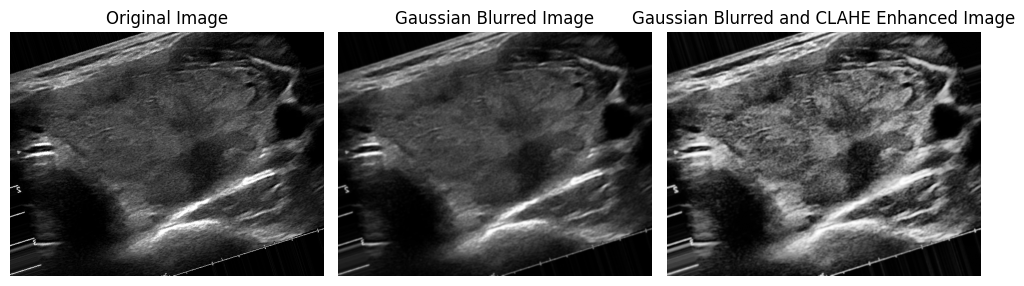

In [12]:
preprocess_image(image_path_0)
preprocess_image(image_path_1)

# 이미지 전처리 (노이즈 제거, CLAHE)

In [13]:
# 이미지 전처리 함수
def preprocess_image(image_path):
  # 1. 이미지 불러오기
  image = cv2.imread(image_path)

  # 2. 노이즈 제거
  blurred_image = cv2.GaussianBlur(image, (5,5), 0)

  # 3. 그레이스케일로 변환
  gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

  # 4. CLAHE로 대비 향상
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  enhanced_image = clahe.apply(gray_image)

  return enhanced_image

In [14]:
# 폴더 생성 함수
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# 폴더 생성 후 이미지 데이터 전처리
def preprocess_dataset(folder_name, image_paths):
  class_dir = folder_name
  create_dir(class_dir)

  for path in image_paths:
    processed_image = preprocess_image(path)

    file_name = os.path.basename(path)
    save_path = os.path.join(class_dir, file_name)
    cv2.imwrite(save_path, processed_image)

In [10]:
!ls -a

.  ..  .config	sample_data


In [15]:
folder_name_0 = base_dir+'/preprocess_Images/0'
preprocess_dataset(folder_name_0, C0_paths)

In [16]:
# folder_path = '/content/preprocess_Images/0'
image_count = len([f for f in os.listdir(folder_name_0) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
print(image_count)

3282


In [17]:
folder_name_1 = base_dir+'/preprocess_Images/1'
preprocess_dataset(folder_name_1, C1_paths)

In [18]:
# folder_path = '/content/preprocess_Images/1'
image_count = len([f for f in os.listdir(folder_name_1) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
print(image_count)

4006


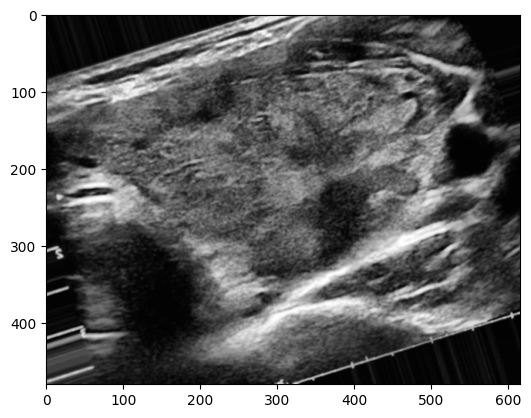

In [19]:
# 전처리 이미지 데이터 확인
image_path = folder_name_1+'/1001_1.bmp'
image = cv2.imread(image_path)
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
!ls -a preprocess_Images

.  ..  0  1


## 데이터셋 분할
훈련용(70%), 검증용(15%), 테스트용(15%)


In [20]:
base_dir += '/preprocess_Images'
base_dir

'../data/augtrain/preprocess_Images'

In [21]:
img_height = 180
img_width = 180
batch_size = 32
seed = 123

In [22]:
# 훈련 데이터 (70%)
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.3,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 7288 files belonging to 2 classes.
Using 5102 files for training.


In [23]:
# 검증 데이터 (30%)
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.3,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 7288 files belonging to 2 classes.
Using 2186 files for validation.


In [24]:
# 검증 데이터 일부를 테스트 데이터로 분할 (15%:15%)

# 검증 데이터셋을 분할
val_batches = list(val_ds)

# 배치에서 이미지와 라벨 분리
images = []
labels = []

for batch in val_batches:
    batch_images, batch_labels = batch
    images.extend(batch_images)
    labels.extend(batch_labels)

# 검증 데이터를 50%씩 분할
split_index = len(images) // 2

# 테스트 데이터셋 생성
test_ds = tf.data.Dataset.from_tensor_slices((images[:split_index], labels[:split_index]))

# 남은 데이터는 검증 데이터로 유지
val_ds = tf.data.Dataset.from_tensor_slices((images[split_index:], labels[split_index:]))

In [30]:
print(f"학습 데이터 크기: {len(train_ds)*batch_size}")
print(f"검증 데이터 크기: {len(val_ds)}")
print(f"테스트 데이터 크기: {len(test_ds)}")

학습 데이터 크기: 5120
검증 데이터 크기: 1093
테스트 데이터 크기: 1093


In [29]:
type(train_ds), type(val_ds)

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 tensorflow.python.data.ops.dataset_ops.TensorSliceDataset)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE # 최적의 버퍼 크기 및 병렬성 자동 설정

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.batch(32).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.batch(32).cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
# 배치된 데이터셋
print(f"훈련 데이터 크기: {len(train_ds)}")
print(f"검증 데이터 크기: {len(val_ds)}")
print(f"테스트 데이터 크기: {len(test_ds)}")

훈련 데이터 크기: 160
검증 데이터 크기: 35
테스트 데이터 크기: 35


# 데이터 증강

In [33]:
# 데이터 증강 레이어 정의
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)), # 좌우 반전
    layers.RandomRotation(0.1), # 10% 회전
    layers.RandomZoom(0.05), # 5% 확대/축소
    layers.RandomContrast(0.05) # 5% 대비 조절
])

In [34]:
# 증강된 데이터 시각화
def visualize_augmentation(augmentation_layer, num_examples=9):
    plt.figure(figsize=(10, 10))
    for images, _ in train_ds.take(1):
        for i in range(num_examples):
            augmented_images = augmentation_layer(images)
            plt.subplot(3, 3, i + 1)
            plt.imshow(augmented_images[0].numpy().astype("uint8"))
            plt.axis("off")
    plt.suptitle("Data Augmentation Examples", fontsize=16)
    plt.show()

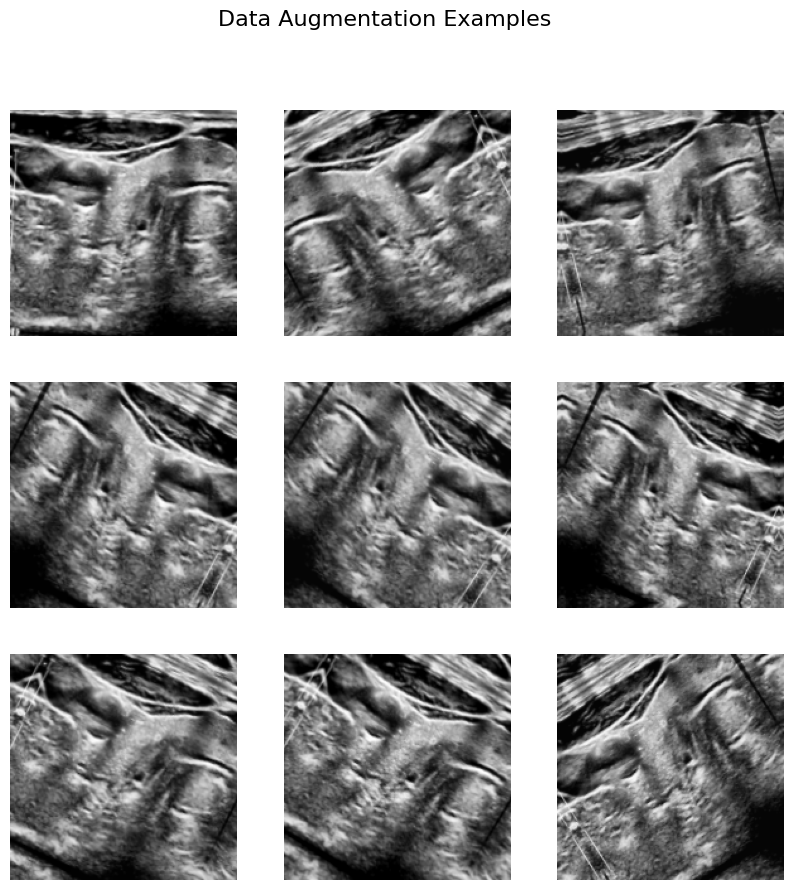

In [35]:
visualize_augmentation(data_augmentation)

# 모델 설계

In [36]:
# ConvNeXt 사전 학습된 모델 로드
base_model = ConvNeXtTiny(
    include_top=False, # 마지막 분류 레이어 제거
    input_shape=(img_height, img_width, 3),
    weights='imagenet' # ImageNet으로 사전 학습된 가중치 사용
)

# 모델 구성
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')  # 이진 분류 (암/정상)
])

111650432/111650432 [==============================] - 10s 0us/step


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_tiny (Functional)  (None, 5, 5, 768)         27820128  
                                                                 
 global_average_pooling2d (G  (None, 768)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               98432     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 27,918,818
Trainable params: 27,918,818
Non-trainable params: 0
__________________________________________

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습

In [39]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
 57/160 [=========>....................] - ETA: 15:40 - loss: 0.7260 - accuracy: 0.5466

KeyboardInterrupt: 

In [33]:
# 정확도와 손실에 대한 그래프
def accuracy_loss_graph(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

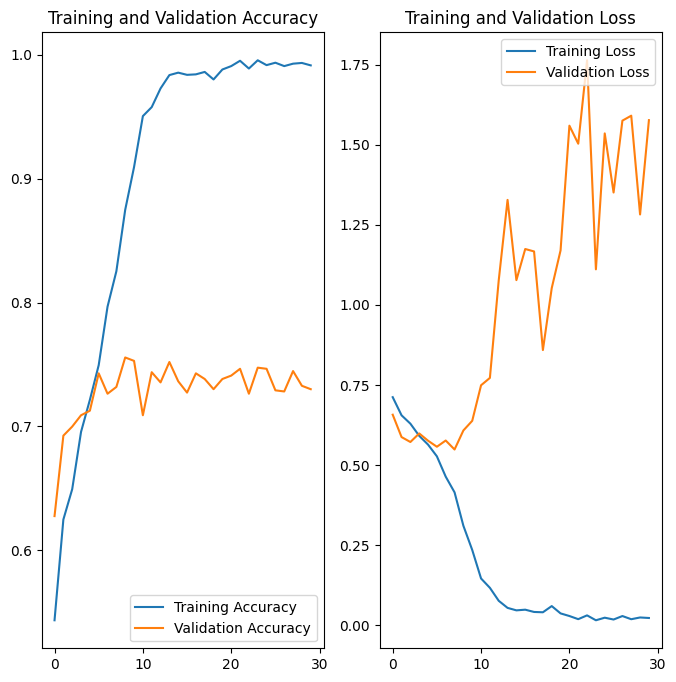

In [ ]:
accuracy_loss_graph(history, 30)

## 모델 테스트

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"테스트 정확도 (Accuracy): {test_acc * 100:.2f}%")
print(f"테스트 손실 (Loss): {test_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6965 - loss: 1.7902
테스트 정확도 (Accuracy): 71.55%
테스트 손실 (Loss): 1.7700


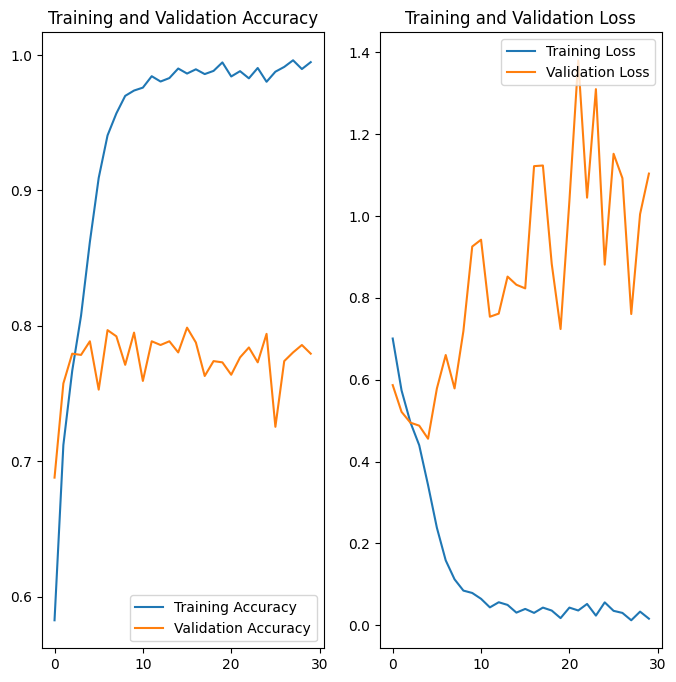

In [ ]:
accuracy_loss_graph(history, 30)

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print('test acc:', test_acc)
print('test loss:', test_loss)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7737 - loss: 1.0322
test acc: 0.7740164399147034
test loss: 1.0260225534439087


# 데이터 증강 후 모델 설계

In [27]:
# 데이터 증강 포함한 전체 모델 구성
base_model = ConvNeXtTiny(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    weights='imagenet'
)

model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # 이진 분류 (암/정상)
])

111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_tiny (Functional)           │ (None, 5, 5, 768)           │      27,820,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 768)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,918,689 (106.50 MB)

 Trainable params: 27,918,689 (106.50 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 모델 학습

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 검증 손실이 5 에폭 동안 개선되지 않으면 학습 중단
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

In [31]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 183s 902ms/step - accuracy: 0.5185 - loss: 0.7435 - val_accuracy: 0.4382 - val_loss: 0.7099
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 135s 845ms/step - accuracy: 0.5249 - loss: 0.6978 - val_accuracy: 0.5508 - val_loss: 0.6890
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 135s 845ms/step - accuracy: 0.5469 - loss: 0.6893 - val_accuracy: 0.5508 - val_loss: 0.6880
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 135s 846ms/step - accuracy: 0.5490 - loss: 0.6900 - val_accuracy: 0.5508 - val_loss: 0.6899
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 135s 843ms/step - accuracy: 0.5489 - loss: 0.6910 - val_accuracy: 0.5508 - val_loss: 0.6880
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 135s 843ms/step - accuracy: 0.5478 - loss: 0.6905 - val_accuracy: 0.5508 - val_loss: 0.6885
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 135s 844ms/step - accuracy: 0.5498 - loss: 0.6889 - val_accuracy: 0.5508 - val_loss: 0.6882
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 135s 843ms/step - accuracy: 0.5341 -

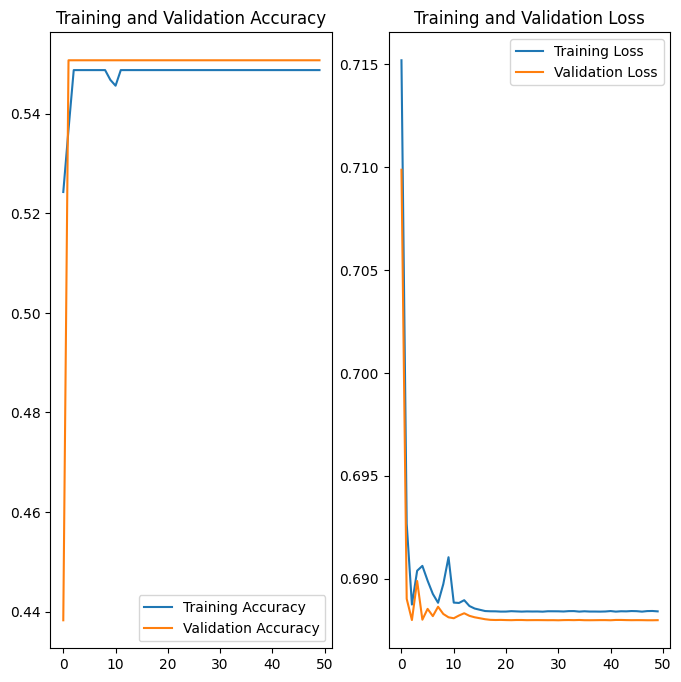

In [34]:
accuracy_loss_graph(history, 50)

## 모델 테스트

In [35]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"테스트 정확도 (Accuracy): {test_acc * 100:.2f}%")
print(f"테스트 손실 (Loss): {test_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.5551 - loss: 0.6871
테스트 정확도 (Accuracy): 55.26%
테스트 손실 (Loss): 0.6876


# 이전에 돌렸던 데이터 증강 후 모델 테스트 버전

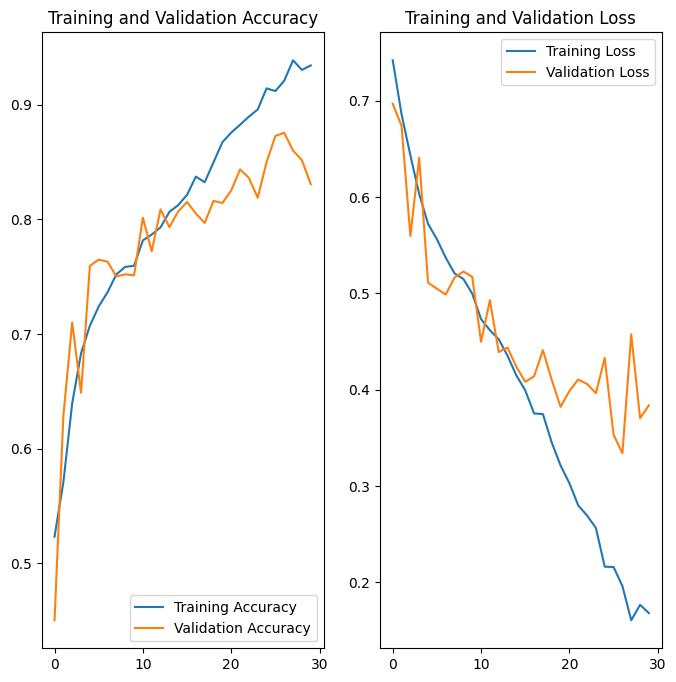

In [ ]:
accuracy_loss_graph(history, 30)

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print('test acc:', test_acc)
print('test loss:', test_loss)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8448 - loss: 0.3492
test acc: 0.8444647789001465
test loss: 0.3500182330608368
